 import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn
from sklearn import preprocessing
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold

In [2]:
df=pd.read_csv('fas_data_ALLDUR.csv')

In [3]:
print(df.columns.tolist())

['Unnamed: 0', 'index', 'D5_75_', 'D20_80_', 'D5_95_', 'f_0.1', 'f_0.106', 'f_0.112', 'f_0.118', 'f_0.125', 'f_0.132', 'f_0.14', 'f_0.148', 'f_0.156', 'f_0.165', 'f_0.175', 'f_0.185', 'f_0.195', 'f_0.206', 'f_0.218', 'f_0.231', 'f_0.244', 'f_0.258', 'f_0.273', 'f_0.289', 'f_0.305', 'f_0.323', 'f_0.341', 'f_0.361', 'f_0.381', 'f_0.403', 'f_0.426', 'f_0.451', 'f_0.477', 'f_0.504', 'f_0.533', 'f_0.563', 'f_0.596', 'f_0.63', 'f_0.666', 'f_0.704', 'f_0.745', 'f_0.787', 'f_0.833', 'f_0.88', 'f_0.931', 'f_0.984', 'f_1.041', 'f_1.1', 'f_1.163', 'f_1.23', 'f_1.301', 'f_1.375', 'f_1.454', 'f_1.538', 'f_1.626', 'f_1.719', 'f_1.818', 'f_1.922', 'f_2.032', 'f_2.149', 'f_2.272', 'f_2.402', 'f_2.54', 'f_2.686', 'f_2.84', 'f_3.003', 'f_3.175', 'f_3.357', 'f_3.55', 'f_3.753', 'f_3.969', 'f_4.196', 'f_4.437', 'f_4.691', 'f_4.96', 'f_5.245', 'f_5.546', 'f_5.864', 'f_6.2', 'f_6.556', 'f_6.932', 'f_7.329', 'f_7.75', 'f_8.194', 'f_8.664', 'f_9.161', 'f_9.687', 'f_10.242', 'f_10.83', 'f_11.451', 'f_12.108', 

In [4]:
df.dropna(axis=0,inplace=True)
df.shape

(106982, 106)

In [5]:
input_var=df[['D20_80_', 'f_0.1', 'f_0.106', 'f_0.112', 'f_0.118', 'f_0.125', 'f_0.132', 'f_0.14', 'f_0.148',
                      'f_0.156', 'f_0.165', 'f_0.175', 'f_0.185', 'f_0.195', 'f_0.206', 'f_0.218', 'f_0.231', 'f_0.244',
                      'f_0.258', 'f_0.273', 'f_0.289', 'f_0.305', 'f_0.323', 'f_0.341', 'f_0.361', 'f_0.381', 'f_0.403',
                      'f_0.426', 'f_0.451', 'f_0.477', 'f_0.504', 'f_0.533', 'f_0.563', 'f_0.596', 'f_0.63', 'f_0.666', 
                      'f_0.704', 'f_0.745', 'f_0.787', 'f_0.833', 'f_0.88', 'f_0.931', 'f_0.984', 'f_1.041', 'f_1.1',
                      'f_1.163', 'f_1.23', 'f_1.301', 'f_1.375', 'f_1.454', 'f_1.538', 'f_1.626', 'f_1.719', 'f_1.818', 
                      'f_1.922', 'f_2.032', 'f_2.149', 'f_2.272', 'f_2.402', 'f_2.54', 'f_2.686', 'f_2.84', 'f_3.003',
                      'f_3.175', 'f_3.357', 'f_3.55', 'f_3.753', 'f_3.969', 'f_4.196', 'f_4.437', 'f_4.691', 'f_4.96', 
                      'f_5.245', 'f_5.546', 'f_5.864', 'f_6.2', 'f_6.556', 'f_6.932', 'f_7.329', 'f_7.75', 'f_8.194',
                      'f_8.664', 'f_9.161', 'f_9.687', 'f_10.242', 'f_10.83', 'f_11.451', 'f_12.108', 'f_12.802', 'f_13.536', 
                      'f_14.313', 'f_15.134', 'f_16.002', 'f_16.92', 'f_17.89', 'f_18.916', 'f_20.001', 'f_21.148', 'f_22.361',
                      'f_23.644', 'f_25.0']]

In [6]:
y_var=df[['pga']]
y_var=np.log(y_var)
y_var=np.array(y_var)
y_var

array([[0.24216156],
       [0.30821972],
       [0.35627486],
       ...,
       [0.31626953],
       [1.95132404],
       [0.95896701]])

In [8]:
#input_var

In [9]:
X_train, X_test, y_train, y_test=train_test_split(input_var,y_var,test_size=0.2)

In [10]:
model=Sequential([Dense(units=50, input_shape=(101,), activation='tanh'),
                  
                  Dense(units=1, activation='linear')])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 5,151
Trainable params: 5,151
Non-trainable params: 0
_________________________________________________________________


In [12]:
df.describe()

,Unnamed: 0,index,D5_75_,D20_80_,D5_95_,f_0.1,f_0.106,f_0.112,f_0.118,f_0.125,...,f_16.002,f_16.92,f_17.89,f_18.916,f_20.001,f_21.148,f_22.361,f_23.644,f_25.0,pga
count,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,1.069820e+05,1.069820e+05,1.069820e+05,1.069820e+05,1.069820e+05,...,106982.000000,1.069820e+05,1.069820e+05,1.069820e+05,1.069820e+05,1.069820e+05,1.069820e+05,1.069820e+05,1.069820e+05,106982.000000
mean,58497.127750,28991.627750,13.063829,9.714078,27.418717,5.463666e-04,6.119821e-04,6.832189e-04,7.639891e-04,8.533941e-04,...,0.002692,2.270078e-03,1.924690e-03,1.661319e-03,1.461649e-03,1.287821e-03,1.131475e-03,9.983069e-04,8.805933e-04,7.451248
std,34208.882305,17310.833621,11.761638,10.402221,20.062498,3.744008e-03,4.178763e-03,4.664876e-03,5.250269e-03,5.893403e-03,...,0.009266,8.153474e-03,7.254000e-03,6.495222e-03,5.896707e-03,5.438898e-03,5.023072e-03,4.580514e-03,4.117510e-03,26.199895
min,0.000000,0.000000,0.060000,0.050000,0.335000,1.918383e-08,2.387068e-08,2.235663e-08,2.653885e-08,5.331271e-08,...,0.000003,9.460733e-07,4.312745e-07,3.283740e-07,2.652877e-07,2.447070e-07,2.390122e-07,2.232137e-07,1.990773e-07,0.004000
25%,29111.250000,13446.250000,6.020000,4.225000,14.580000,1.296359e-06,1.536080e-06,1.845160e-06,2.184606e-06,2.669182e-06,...,0.000298,2.413304e-04,1.961945e-04,1.638609e-04,1.383619e-04,1.160719e-04,9.847905e-05,8.457142e-05,7.272223e-05,1.097000
50%,59010.500000,29111.000000,10.355000,6.860000,21.380000,8.584374e-06,1.024773e-05,1.234190e-05,1.462356e-05,1.730042e-05,...,0.000805,6.572644e-04,5.409373e-04,4.543364e-04,3.887149e-04,3.299744e-04,2.797905e-04,2.387051e-04,2.024145e-04,2.337000
75%,88121.750000,44095.750000,15.970000,11.090000,33.580000,5.791325e-05,6.675065e-05,7.616329e-05,8.734585e-05,1.007050e-04,...,0.002130,1.772710e-03,1.480167e-03,1.258360e-03,1.090311e-03,9.454349e-04,8.123632e-04,6.957880e-04,5.957214e-04,5.498000
max,118021.000000,59010.000000,216.720000,235.680000,246.330000,4.506172e-01,5.007584e-01,5.510262e-01,6.018347e-01,6.499692e-01,...,0.757825,7.629326e-01,6.779354e-01,5.970292e-01,6.021466e-01,6.442016e-01,6.361269e-01,5.895877e-01,5.099712e-01,2449.245000


In [13]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error')

Train on 77026 samples, validate on 8559 samples
Epoch 1/50
77026/77026 [==============================] - 2s 20us/step - loss: 0.2579 - val_loss: 0.0908
Epoch 2/50
77026/77026 [==============================] - 1s 19us/step - loss: 0.0784 - val_loss: 0.0576
Epoch 3/50
77026/77026 [==============================] - 1s 19us/step - loss: 0.0612 - val_loss: 0.0544
Epoch 4/50
77026/77026 [==============================] - 1s 19us/step - loss: 0.0545 - val_loss: 0.0530
Epoch 5/50
77026/77026 [==============================] - 1s 19us/step - loss: 0.0507 - val_loss: 0.0458
Epoch 6/50
77026/77026 [==============================] - 1s 19us/step - loss: 0.0479 - val_loss: 0.0572
Epoch 7/50
77026/77026 [==============================] - 1s 19us/step - loss: 0.0472 - val_loss: 0.0428
Epoch 8/50
77026/77026 [==============================] - 1s 19us/step - loss: 0.0457 - val_loss: 0.0391
Epoch 9/50
77026/77026 [==============================] - 2s 21us/step - loss: 0.0450 - val_loss: 0.0467
Epoch 

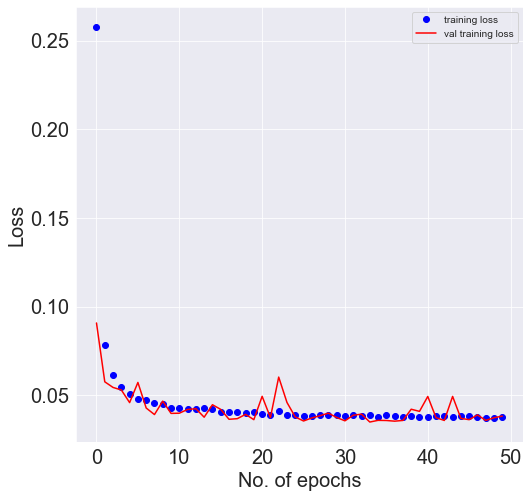

In [14]:
history=model.fit(X_train, y_train,batch_size=128, epochs=50, validation_split=0.1, verbose=1)
history_dict=history.history
    
loss_values= history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure(figsize=(8,8))
plt.style.use('seaborn-pastel')
sns.color_palette("rocket")
sns.set_style("darkgrid")
    
plt.plot(loss_values, 'bo', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend(fontsize=10)


plt.ylabel('Loss' ,fontsize=20)
plt.xlabel('No. of epochs', fontsize=20)


plt.tick_params(axis='both', which='major', labelsize=20)

In [15]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

print('R2 score on train set is :\t{:0.3f}'.format(r2_score(y_train, y_train_pred)))
print('R2 score on test set is :\t{:0.3f}'.format(r2_score(y_test, y_test_pred)))

R2 score on train set is :	0.976
R2 score on test set is :	0.975


Text(0.5, 1.0, 'Duration 20_80')

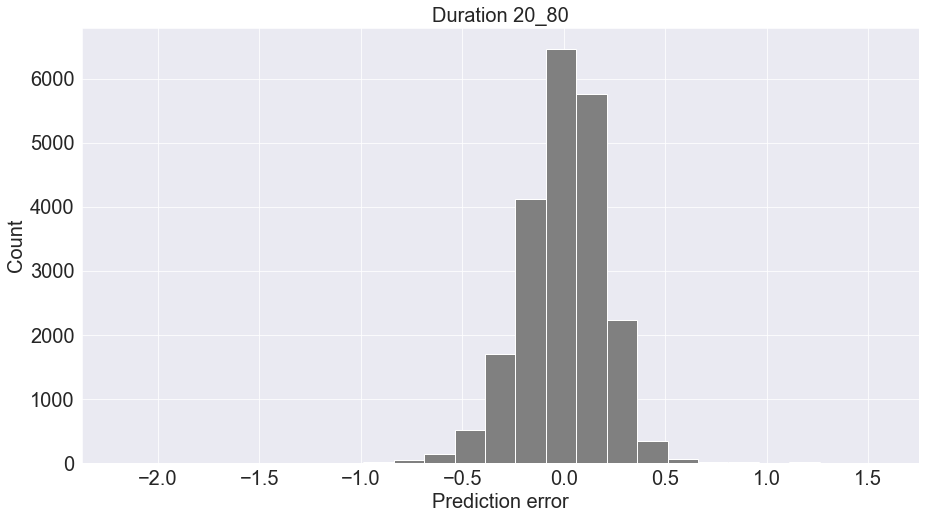

In [16]:
error=y_test_pred-y_test
plt.figure(figsize=(15,8))
plt.hist(error, bins=25, color='grey')

plt.xlabel('Prediction error',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Duration 20_80', fontsize=20)

<Figure size 432x288 with 0 Axes>

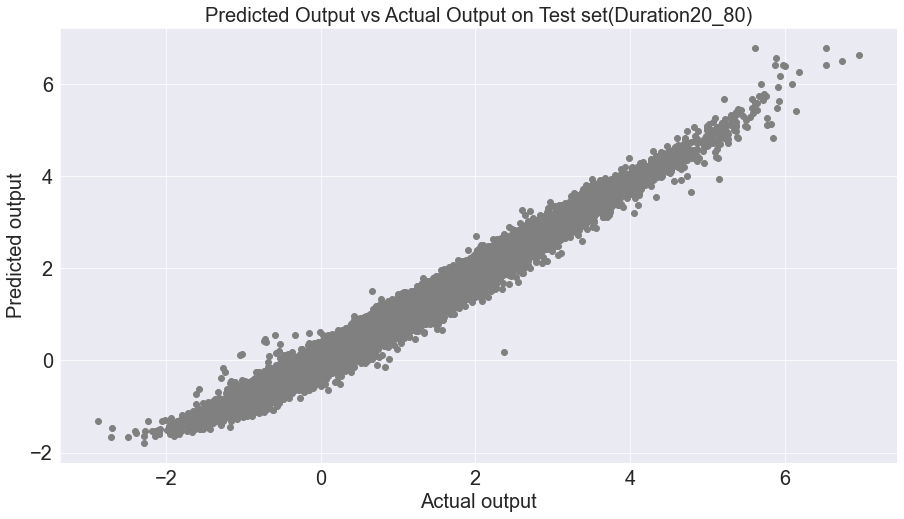

<Figure size 432x288 with 0 Axes>

In [18]:
#plt.plot(y_train,y_train_pred, '*r')
plt.figure(figsize=(15,8))
plt.plot(y_test, y_test_pred, 'o', color='grey')
plt.xlabel('Actual output',fontsize=20)
plt.ylabel('Predicted output',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Predicted Output vs Actual Output on Test set(Duration20_80)', fontsize=20)

plt.figure()

In [19]:
y_test.shape

(21397, 1)

In [20]:
X_data=np.array((input_var))
X_data

array([[1.40350000e+01, 3.29022890e-05, 5.48283990e-05, ...,
        1.06298002e-04, 7.80235633e-05, 5.16962475e-05],
       [1.29850000e+01, 2.30889188e-05, 2.73595781e-05, ...,
        3.24771218e-05, 2.97820103e-05, 2.78276805e-05],
       [3.66500000e+00, 1.61156282e-06, 1.65677032e-06, ...,
        6.04951579e-05, 4.41795273e-05, 3.73364744e-05],
       ...,
       [5.46000000e+00, 2.78263762e-07, 2.57601926e-07, ...,
        4.36379358e-04, 4.03919392e-04, 3.47938418e-04],
       [2.60000000e+00, 1.40131040e-06, 2.52566563e-06, ...,
        1.59799663e-03, 1.43400443e-03, 1.23692654e-03],
       [6.65000000e+00, 1.27957699e-06, 1.77005945e-06, ...,
        2.38561832e-04, 2.53787574e-04, 1.78536851e-04]])

In [21]:
y_pred=model.predict(X_data)
y_pred

array([[0.18112475],
       [0.1273542 ],
       [0.50897676],
       ...,
       [0.5671068 ],
       [1.8493445 ],
       [0.7148679 ]], dtype=float32)

In [22]:
y_pred.shape

(106982, 1)

In [23]:
output_y=df[['pga']]
output_y=np.log(output_y)
output_y

,pga
0,0.242162
1,0.308220
2,0.356275
3,-0.455706
4,0.473747
...,...
106977,0.985070
106978,0.409457
106979,0.316270
106980,1.951324


In [24]:
residual=output_y-y_pred
residual

,pga
0,0.061037
1,0.180866
2,-0.152702
3,-0.126476
4,0.124249
...,...
106977,0.155628
106978,-0.018953
106979,-0.250837
106980,0.101980


In [25]:
dur=input_var['D20_80_']

In [26]:
calc=pd.concat([dur,residual], axis=1)
calc

,D20_80_,pga
0,14.035,0.061037
1,12.985,0.180866
2,3.665,-0.152702
3,4.245,-0.126476
4,11.245,0.124249
...,...,...
106977,3.750,0.155628
106978,6.870,-0.018953
106979,5.460,-0.250837
106980,2.600,0.101980


In [27]:
a=[]
for i in range(0,140,5):
    b=calc[(calc.D20_80_ >= i ) & (calc.D20_80_ <=i+5)].pga.mean()
    a.append(b)
    
a=np.array(a)
a

print(a)
print(len(a))

[ 0.03051277  0.0065706  -0.0233593  -0.04738648 -0.06134446 -0.06710984
 -0.09307388 -0.086939   -0.12597329 -0.16127126 -0.19424608 -0.24296109
 -0.3326657  -0.24859534 -0.42098236 -0.07256868 -0.06622723 -0.03395075
  0.25554982 -0.14703051 -0.21523736 -0.40828395         nan -0.10458334
 -0.60829029         nan -0.14295988         nan]
28


In [28]:
c=[]
for i in range(0,140,5):
    c.append(i)

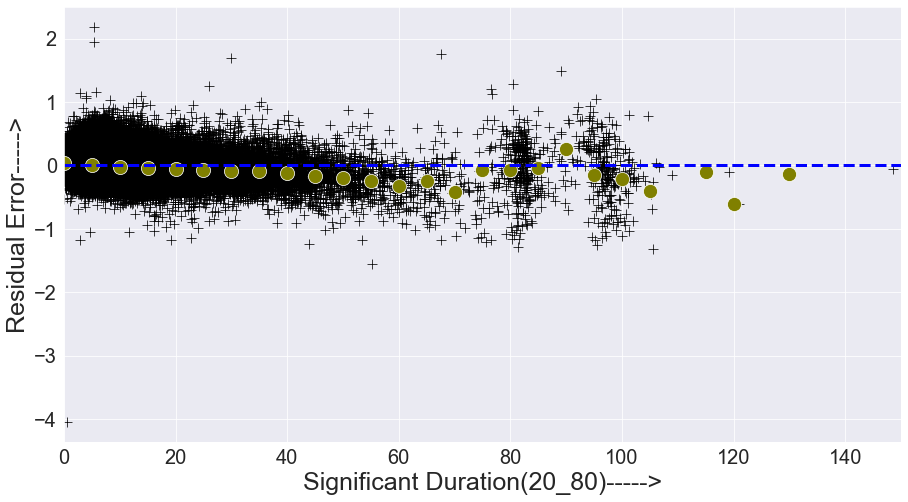

In [29]:
x=input_var['D20_80_']
y=residual['pga']
plt.figure(figsize=(15,8))
plt.hlines(y=0,xmin=0, xmax=250,color='blue',linestyle='--',lw=3)
#sns.scatterplot(d,a, marker='o', color='red',s=200)
sns.scatterplot(x,y, marker='+', color='black', s=90)
sns.scatterplot(c,a, marker='o',s=200,color= 'olive')
plt.ylabel('Residual Error----->', size=25)
plt.xlabel('Significant Duration(20_80)----->', size=25)
plt.xlim(0,150)
plt.tick_params(axis='both', which='major', labelsize=20)

In [30]:
print( "Mean of Training Data:", np.mean(y_train))
print( "Standard Deviation of Training Data:", np.std(y_train))

Mean of Training Data: 0.9707731393307204
Standard Deviation of Training Data: 1.2553564540079796


In [31]:
pred=model.predict(X_test)
pred.shape

(21397, 1)

In [32]:
print( "Mean of Test Data:", np.mean(pred))
print( "Standard Deviation of Test Data:", np.std(pred))

Mean of Test Data: 0.98583704
Standard Deviation of Test Data: 1.1937131
